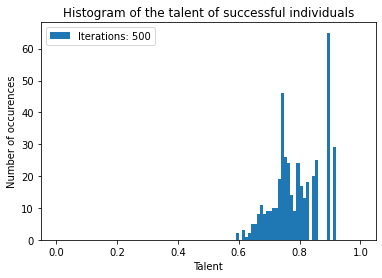


Mean position of successful individuals:  6.8842592592592595
Mean capital of successful individuals:  203892624434.8611
Mean talent of successful individuals:  0.7913139935356109


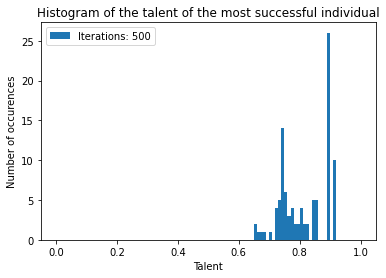


Mean maximum position:  13.49
Mean maximum capital:  880816040090.2125
Mean associated talent:  0.8151099398365291


In [1]:
import functions as f
from matplotlib import pyplot as plt
from matplotlib import animation as an
import numpy as np

np.set_printoptions(precision=3)

# iter_n: number of iterations to go through
iter_n = 500

# pop_n: number of individuals in the popoulation
pop_n = 1000

# lb: lower bound of talent
# ub: upper bound of talent
lb, ub = 0, 1

# mu: average value of the talent distribution
# std: standard deviation of the talent distribution
mu, std = 0.6, 0.1

# le: chance for an individual to go through a lucky event
le = 0.25

# ue: chance for an individual to go through an unlucky event
ue = 0.25

# runs: number of runs to aggregate over
runs = 100

talent, t_i = f.populate(pop_n, lb, ub, mu, std)

# Running the simulations:
mst, msp, successful = f.many_runs(talent, iter_n, ue, le, runs)

# msc: Most Successful Capital (final capital of the most succesful individual)
msc = f.cpt_map(msp)

plt.hist(successful[:, 0], bins=100, range=(0, 1))
plt.title('Histogram of the talent of successful individuals')
plt.xlabel('Talent')
plt.ylabel('Number of occurences')
plt.legend(['Iterations: ' + str(iter_n)], loc='upper left')
plt.savefig('successful_individuals')
plt.show()

print('\nMean position of successful individuals: ', np.mean(successful[:, 1]))
print('Mean capital of successful individuals: ', np.mean(f.cpt_map(successful[:, 1])))
print('Mean talent of successful individuals: ', np.mean(successful[:, 0]))


plt.hist(mst, bins=100, range=(0, 1))
plt.title('Histogram of the talent of the most successful individual')
plt.xlabel('Talent')
plt.ylabel('Number of occurences')
plt.legend(['Iterations: ' + str(iter_n)], loc='upper left')
plt.savefig('mst')
plt.show()

print('\nMean maximum position: ', np.mean(msp))
print('Mean maximum capital: ', np.mean(msc))
print('Mean associated talent: ', np.mean(mst))

In [2]:
%load_ext line_profiler

In [3]:
runs = 10000

In [4]:
%lprun -f f.many_runs f.many_runs(talent, iter_n, ue, le, runs)

Timer unit: 1e-06 s

Total time: 225.114 s
File: /home/fran/tvl/functions.py
Function: many_runs at line 143

Line #      Hits         Time  Per Hit   % Time  Line Contents
   143                                           def many_runs(talent: np.ndarray, time, unlucky_event, lucky_event, runs):
   144                                           
   145                                               # Initialize arrays to hold the position and the talent for the most succesful individual of each run:
   146                                           
   147                                               # mst: Most Successful Talent (talent of the most succesful individual)
   148         1         11.0     11.0      0.0      mst = np.empty(runs)
   149                                           
   150                                               # msp: Most Successful Position (final position of the most succesful individual)
   151         1          2.0      2.0      0.0      msp = np.e

In [5]:
iter_n = 1000

In [6]:
%lprun -f f.many_runs f.many_runs(talent, iter_n, ue, le, runs)

Timer unit: 1e-06 s

Total time: 449.105 s
File: /home/fran/tvl/functions.py
Function: many_runs at line 143

Line #      Hits         Time  Per Hit   % Time  Line Contents
   143                                           def many_runs(talent: np.ndarray, time, unlucky_event, lucky_event, runs):
   144                                           
   145                                               # Initialize arrays to hold the position and the talent for the most succesful individual of each run:
   146                                           
   147                                               # mst: Most Successful Talent (talent of the most succesful individual)
   148         1         17.0     17.0      0.0      mst = np.empty(runs)
   149                                           
   150                                               # msp: Most Successful Position (final position of the most succesful individual)
   151         1          2.0      2.0      0.0      msp = np.e

In [7]:
%timeit -r 10 -n 100 f.evolution(talent, iter_n, ue, le)

40.5 ms ± 485 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [8]:
%lprun -f f.evolution f.evolution(talent, iter_n, ue, le)

Timer unit: 1e-06 s

Total time: 0.048056 s
File: /home/fran/tvl/functions.py
Function: evolution at line 45

Line #      Hits         Time  Per Hit   % Time  Line Contents
    45                                           def evolution(talent: np.ndarray, time, unlucky_event, lucky_event, history=False):
    46                                               '''
    47                                               Perform the simulation proper:
    48                                                   -talent: array containing the sorted talent distribution of the population
    49                                                   -time: number of iterations
    50                                                   -unlucky_event: chance for an individual to go through an unlucky event
    51                                                   -lucky_event: chance for an individual to go through a lucky event
    52                                           
    53                           